### Description 

1.  Download dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/
2.  Explore dataset:
       - Feature analysis(distributions, correlation)
       - Target analysis(balance/imbalance)
3.  Use algorithms from trees and linear notebooks: 
       - tune model parameters : use GridSearch, KFold
       - try different metrics : accuracy, roc auc
       - algorithm visualization
       - algorithm comparing     
4. Advanced: try [XGBoost](https://xgboost.readthedocs.io/en/latest/), [LightGBM](https://lightgbm.readthedocs.io/en/latest/) or [CatBoost](https://catboost.ai/) 
5. Conclusion


In [44]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

%matplotlib inline

In [26]:
# extract the column names from file
with open('spambase/spambase.names','r') as names_file:
    import re
    column_names = re.findall('[\r|\n|\r\n](\S*):', names_file.read())

column_names.append('spam')

# load data
data = pd.read_csv('spambase/spambase.data', names=column_names)

# show some data
print('Data shape is {0}'.format(data.shape))
data.head()

Data shape is (4601, 58)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [34]:
# classes relation
m,n = data.shape
print('Spam emails are {0:.3}% and non-spam emails are {1:.3}% of whole emails'
      .format(len(data[data.spam == True])/m,len(data[data.spam == False])/m))

# separate into X and y
X,y = data.iloc[:,:-1],data.spam
X.describe()

Spam emails are 0.394% and non-spam emails are 0.606% of whole emails


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


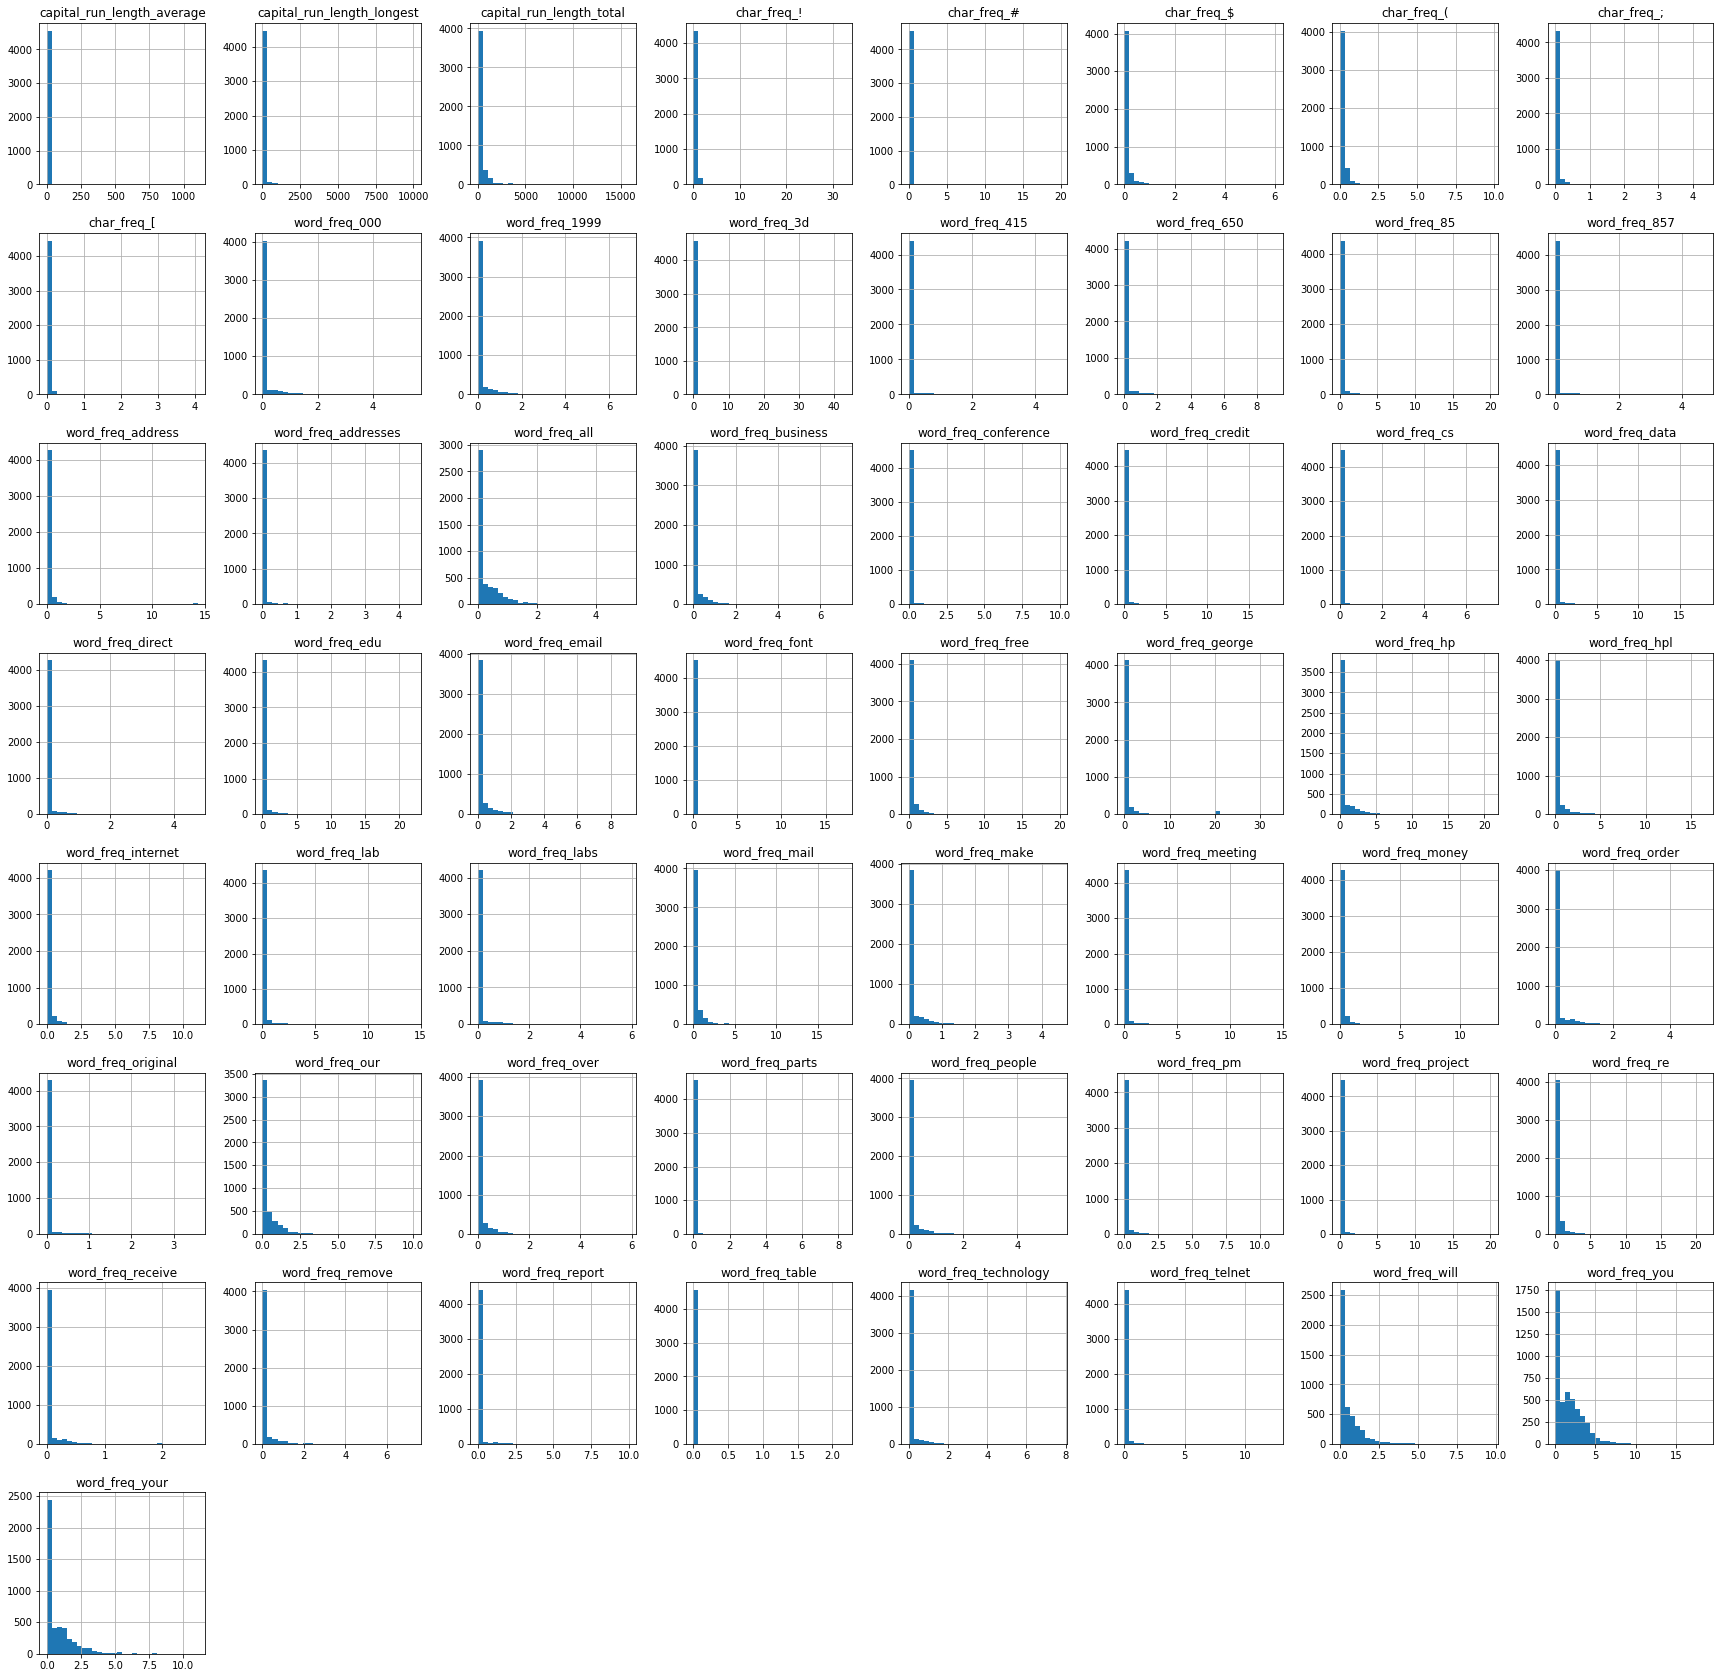

In [50]:
# distrubution with zero values
X.hist(bins=30, figsize=(30,30));

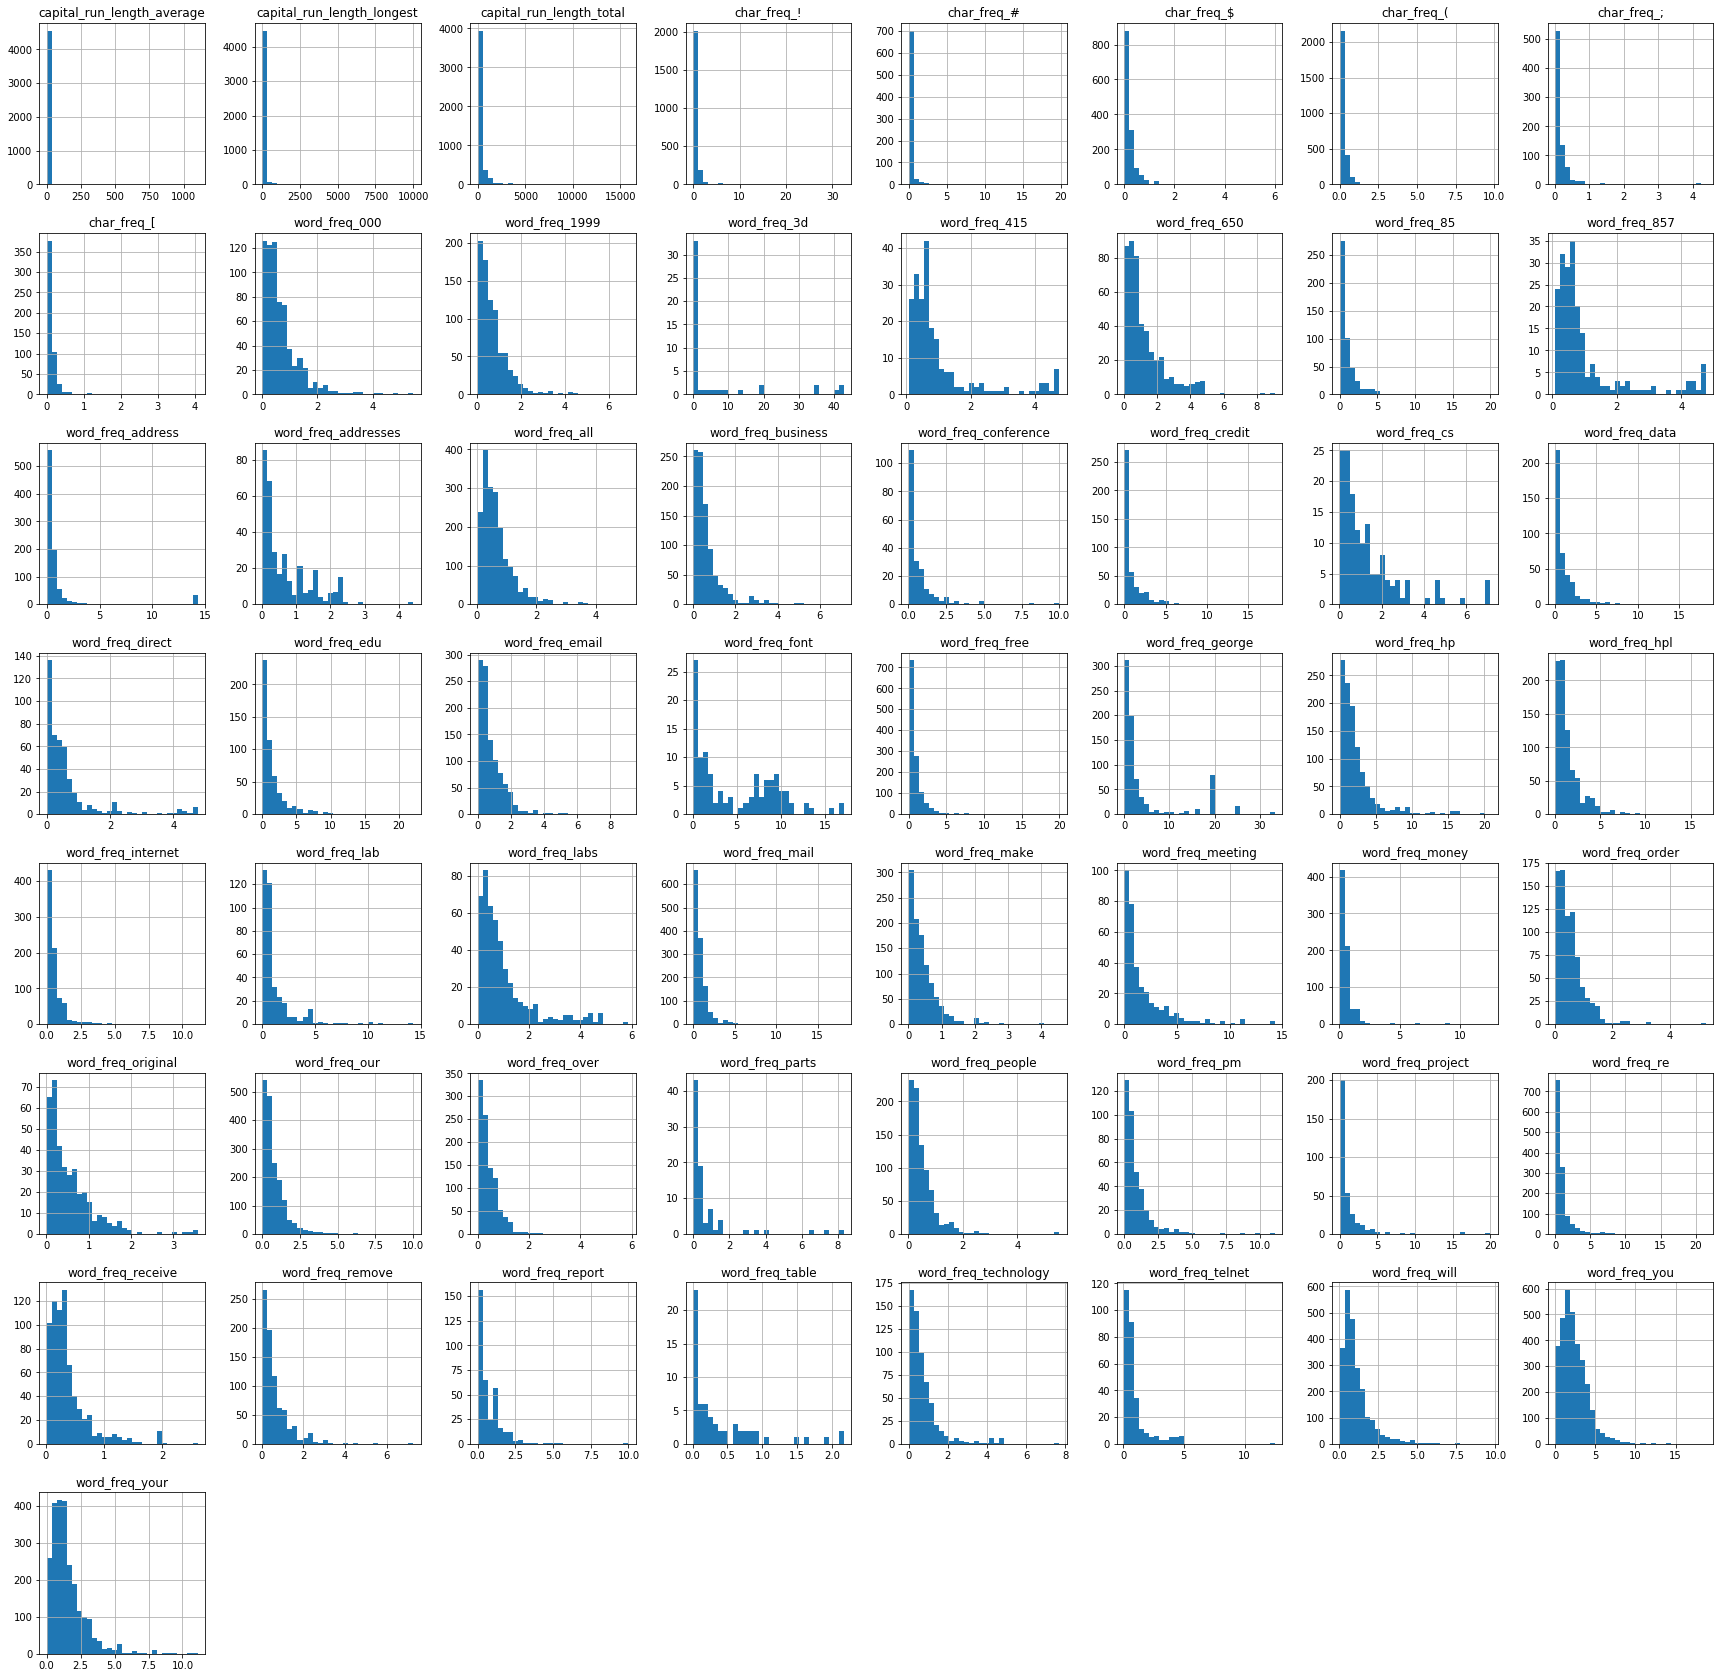

In [51]:
# distribution without zero values
X[X[:] > 0].hist(bins=30, figsize=(30,30));

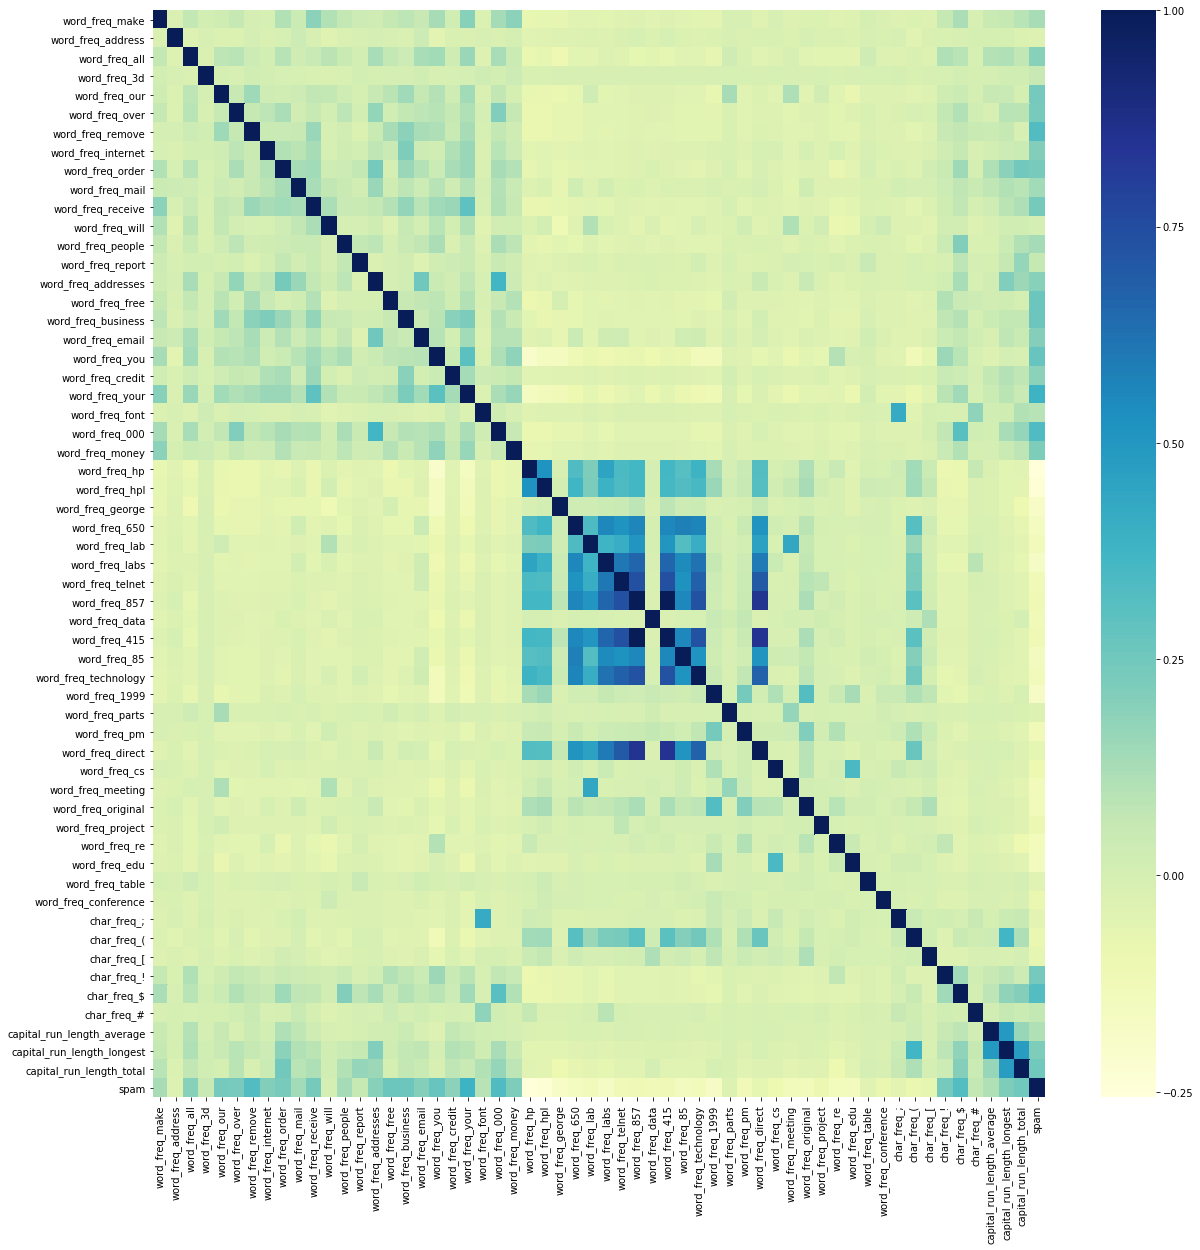

In [45]:
# the features correlation
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cmap='YlGnBu');